# Snapchat Political Ads
This project uses political ads data from Snapchat, a popular social media app. 

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.snap.com/en-US/political-ads/). Download both the 2018 CSV and the 2019 CSV. 



# Summary of Findings

### Introduction
Each row of the dataset is a unique political ad and the columns describe different charateristics of the ad.We wanted to determine which factors between money spent, Gender, CandidateBallotInformation, and country best determine how many views/impressions the ad received. 

Question: Does the information that an ad is expensive (ads that cost at least the median), the ad provides it's affiliated group, the ad targets a gender, or the ad is featured in the United States provide the best indication for how many views (impressions) the ad got?

Null Hypothesis: Impressions cannot be predicted based on another column.

Alternative Hypothesis: There is a column that suggest an indication about how many impressions the ad recieved.

### Cleaning and EDA
We kept the columns spend, Gender, CountryCode, and CandidateBallotInformation as it is relevant characteristics that we believe have a relation with the number of impressions the ad recieves. 
 #### Univariate:
 Impressions: The number of Impressions for each ad is heavily skewed with a median of 7.268950e+04, a mean of 7.022956e+05 and a max of 2.349018e+08
 
 Spend: The amount spent is heavily skewed with a median of 197.5,a mean of 1673.97, and maximum 451,244. 
 
 Gender: Ads most target both genders.
 
 CountryCode: Political ads are most common in the US.
 
 CandidateBallotInformation: A majority of the data is null, but when not null, the most popular candidate ballot 
 information would be general election.
 
 ### Bivariate
 Impressions vs Spend: We see that there is a 0.84 corealation between Impressions and Spend
 
 Impressions vs Gender: We see all gender has more Impressions on average than a targeted gender on.
 
 Impressions vs CountryCode: We see USA has more Impressions on average than countries outside of the US 
 
 Impresions vs CandidateBallotInformation: We see that ads that dont provide CandidateBallotinformation have more impressions on average than ads that do provide it.

### Assessment of Missingness
The CandidateBallotInformation column is not NMAR because the values in the column are not missing becuase of the value they have. The CandidateBallotInformation column is dependent on the Gender Column, and not dependent on Impressions. The pvalues for CandidateBallotInformation on Impressions were 0.71 which tells us it was not significant while the pvalue for Gender is 0 which means that it is likely to have a better informed guess about whether the Candidate Ballot Information is missing or not if we know the gender targeted for the ad.

### Hypothesis Test
We split each column into two groups, so that we can conduct a difference of means permutation test for Impressions. For Spend we classified expensive as being at least the median and not expensive as being below the median. For Gender we split it into all genders or targeted genders. For CountryCode we split it into inside the US or outside the US. For CandidateBallotInformation, we split it into whether the ad provided its group affiliation or not. 

We found that the pvalue for spend was the lowest which indicates that it gives us the best prediction for how many Impressions the ad would get. 

Thus we reject the null hypothesis. 

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures


### Cleaning and EDA

# Cleaning Data

In [97]:
#We picked out the columns that we found relevant to our question
first = pd.read_csv('PoliticalAds2018.csv')
sec = pd.read_csv('PoliticalAds2019.csv')
ads = pd.concat([first,sec],ignore_index=True)
cleaned = ads[['Impressions','Spend','Gender','CountryCode','CandidateBallotInformation']]

# Univariate Analysis

## Impressions

count    4.268000e+03
mean     7.022956e+05
std      4.944558e+06
min      1.000000e+00
25%      1.320050e+04
50%      7.268950e+04
75%      3.237462e+05
max      2.349018e+08
Name: Impressions, dtype: float64

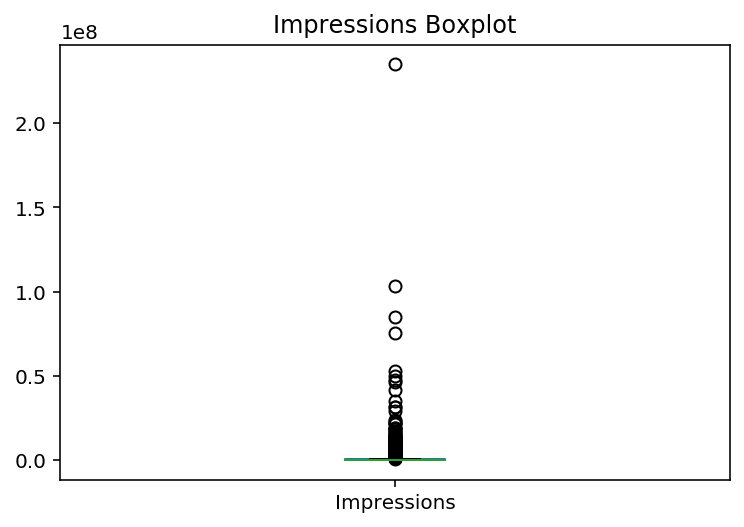

In [3]:
cleaned['Impressions'].plot(kind='box',title='Impressions Boxplot')
cleaned['Impressions'].describe()

## Spend

count      4268.000000
mean       1673.971415
std       12209.119433
min           0.000000
25%          40.000000
50%         197.500000
75%         768.000000
max      451244.000000
Name: Spend, dtype: float64

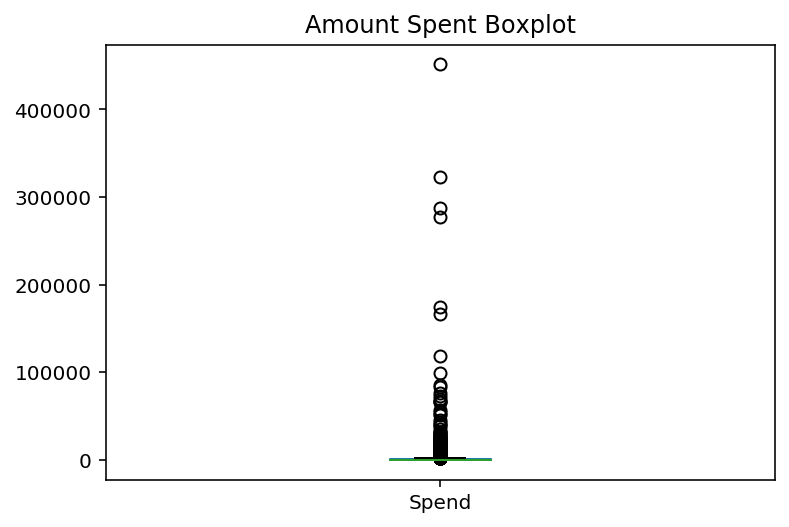

In [102]:
cleaned['Spend'].plot(kind='box',title='Amount Spent Boxplot')
cleaned['Spend'].describe()

## Gender

ALL GENDER    3883
FEMALE         293
MALE            92
Name: Gender, dtype: int64

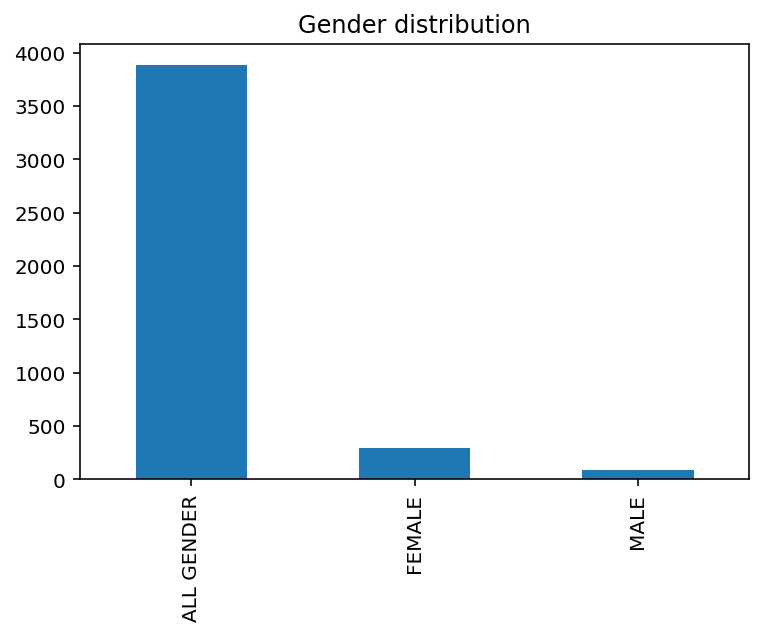

In [101]:
cleaned['Gender'].fillna('ALL GENDER').value_counts().plot(kind='bar',title='Gender distribution')
cleaned['Gender'].fillna('ALL GENDER').value_counts()

## CountryCode

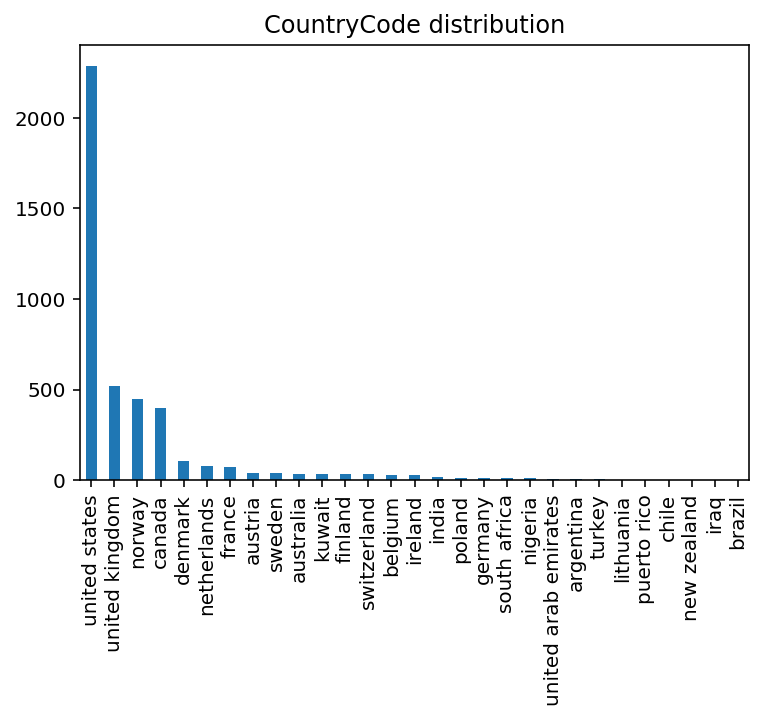

In [100]:
cleaned['CountryCode'].value_counts().plot(kind='bar',title='CountryCode distribution')

## CandidateBallotInformation

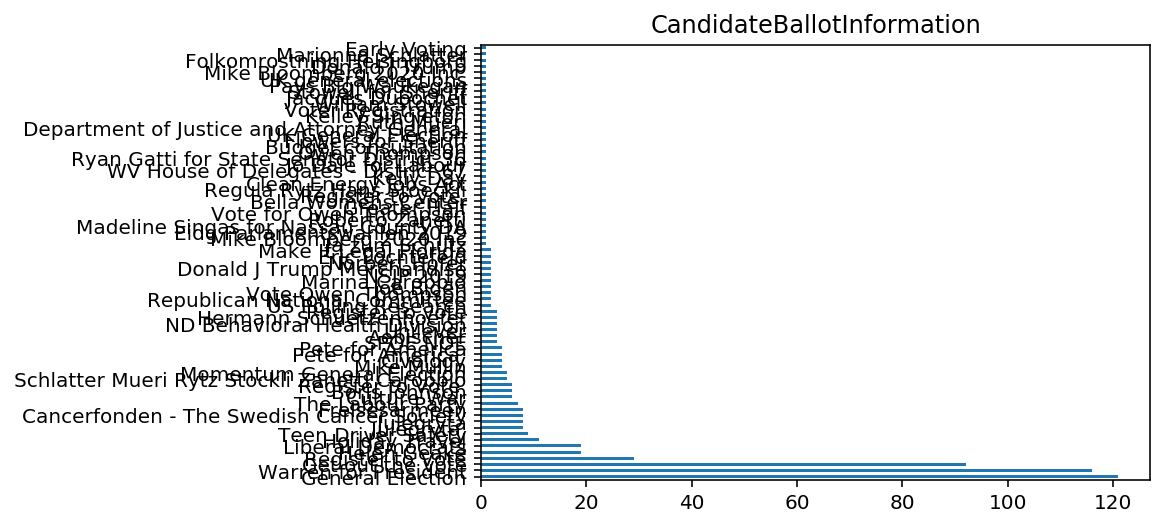

In [99]:
cleaned['CandidateBallotInformation'].value_counts().plot(kind='barh',title='CandidateBallotInformation')

# Bivariate Analysis

## Impressions vs Spend

,Impressions,Spend
Impressions,1.000000,0.842282
Spend,0.842282,1.000000


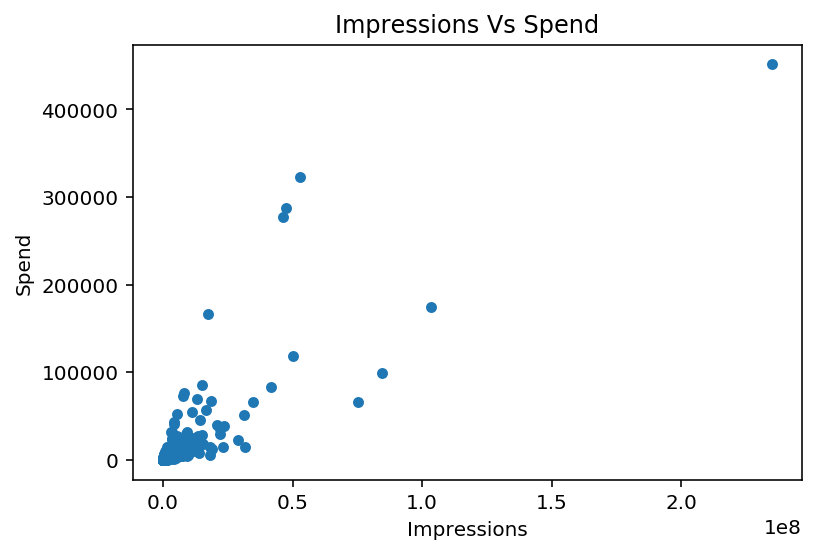

In [120]:
cleaned.plot(kind='scatter',x='Impressions',y='Spend',title='Impressions Vs Spend')
cleaned.corr()

## Gender vs Impression

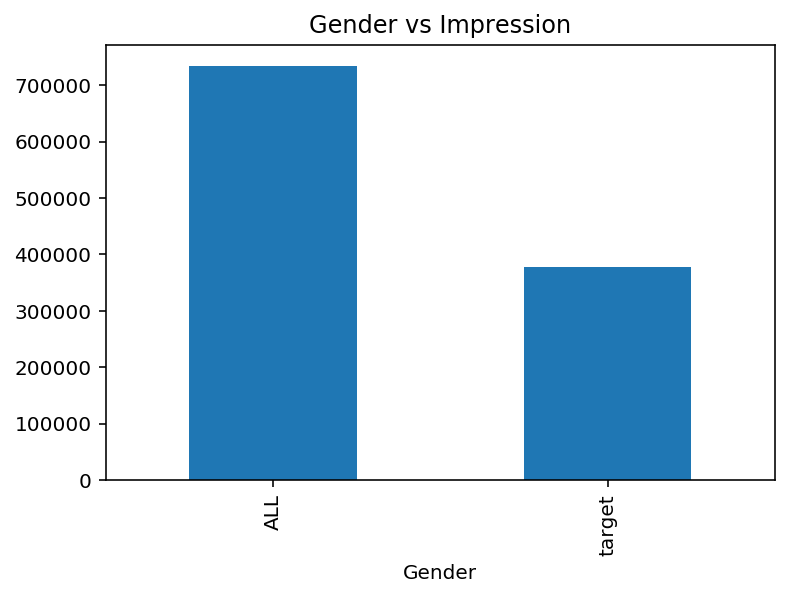

In [112]:
gen = cleaned.assign(Gender=cleaned['Gender'].replace({'MALE':'target','FEMALE':'target'}).fillna('ALL'))
gen.groupby('Gender')['Impressions'].mean().plot(kind='bar',title='Gender vs Impression')

## CountryCode

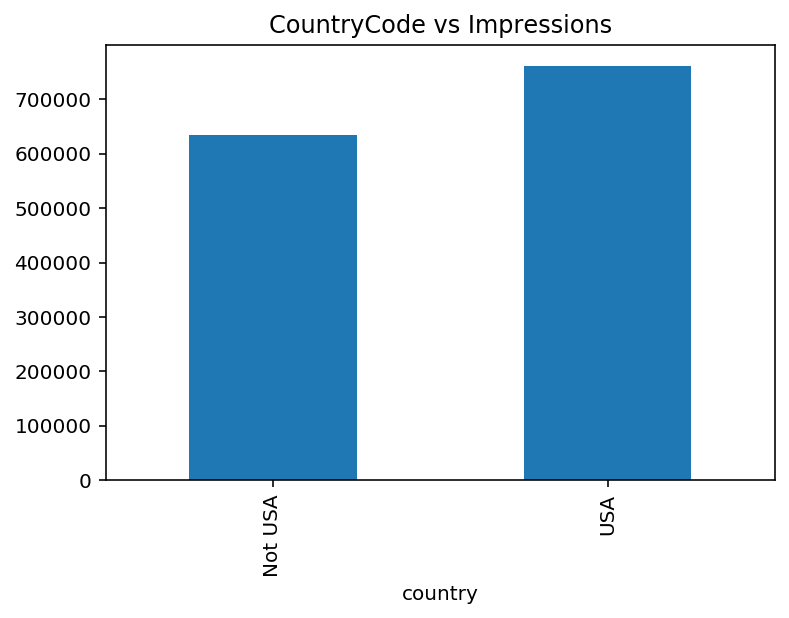

In [115]:
def help(x):
    if(x=='united states'):
        return 'USA'
    else:
        return 'Not USA'
count = cleaned.assign(country =cleaned['CountryCode'].apply(help))
count.groupby('country').Impressions.mean().plot(kind='bar',title='CountryCode vs Impressions')

## CandidateBallotInformation vs Impressions

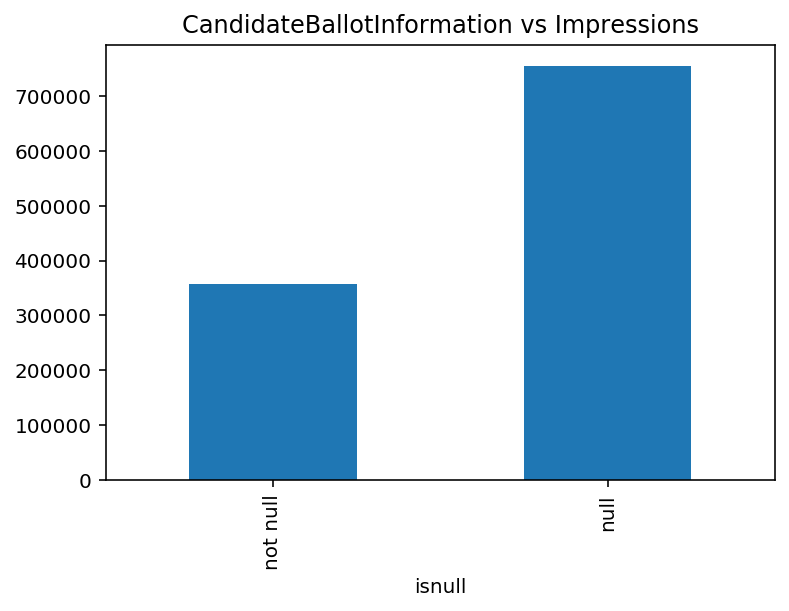

In [119]:
def help(x):
    if(x=='null'):
        return 'null'
    else:
        return 'not null'
hasnull = cleaned.assign(isnull =cleaned['CandidateBallotInformation'].fillna('null').apply(help))
hasnull.groupby('isnull').Impressions.mean().plot(kind='bar',title='CandidateBallotInformation vs Impressions')

### Assessment of Missingness

In [86]:
# Simulation of Missingness of CandidateBallotInformation On Impressions
hasnul = cleaned.assign(isnul = cleaned['CandidateBallotInformation'].isnull())
obs = abs(hasnul.groupby('isnul').Impressions.mean().diff())[1]
means = []
for i in np.arange(1000):
    shuffcol = hasnul['Impressions'].sample(replace=False,frac=1).reset_index(drop=True)
    shufftable = hasnul.assign(**{'newimp':shuffcol})
    add = abs(shufftable.groupby('isnul').newimp.mean().diff())[1]
    means.append(add)
pval = np.count_nonzero(np.array(means)>=obs)/1000
pval


0.071

We do not have evidence to say that Impressions will tell us the missingness of CandidateBallotInformation

In [21]:
# Simulation of Missingness of CandidateBallotInformation On Gender
cop=cleaned.assign(isnul = cleaned['CandidateBallotInformation'].isnull()).assign(Gender=cleaned['Gender'].fillna('ALL'))
grp1 = cop.loc[cop['isnul']==True,'Gender']
grp2 = cop.loc[cop['isnul']==False,'Gender']
obs = ks_2samp(grp1,grp2)[0]

coptwo = cop.copy()
means = []
for i in range(1000):
    shuffcol = coptwo['Gender'].sample(replace=False,frac=1).reset_index(drop=True)
    shufftable = coptwo.assign(**{'newgen':shuffcol})
    grp1 = shufftable.loc[shufftable['isnul']==True,'newgen']
    grp2 = shufftable.loc[shufftable['isnul']==False,'newgen']
    means.append(ks_2samp(grp1,grp2)[0])
np.count_nonzero(np.array(means)>=obs)/1000


0.0

We have evidence that gender gives a good indication of the missingness of CandidateBallot Information

In [99]:
# Simulation of Missingness of CandidateBallotInformation On Spend
hasnul = cleaned.assign(isnul = cleaned['CandidateBallotInformation'].isnull())
obs = abs(hasnul.groupby('isnul').Spend.mean().diff())[1]
means = []
for i in np.arange(1000):
    shuffcol = hasnul['Spend'].sample(replace=False,frac=1).reset_index(drop=True)
    shufftable = hasnul.assign(**{'newspen':shuffcol})
    add = abs(shufftable.groupby('isnul').newspen.mean().diff())[1]
    means.append(add)
pval = np.count_nonzero(np.array(means)>=obs)/1000
pval

0.154

We do not have evidence to say that Spend will have an indication of the missingness of CandidateBallotInformation

### Hypothesis Test

In [47]:
# Gender On Impressions
gen = cleaned.assign(Gender=cleaned['Gender'].replace({'MALE':'target','FEMALE':'target'}).fillna('ALL'))
obs = abs(gen.groupby('Gender').Impressions.mean().diff()[1])

means = []
for i in np.arange(1000):
    shuffcol = gen['Impressions'].sample(replace=False,frac=1).reset_index(drop=True)
    shufftable = gen.assign(**{'newimp':shuffcol})
    add = abs(shufftable.groupby('Gender').newimp.mean().diff())[1]
    means.append(add)
pval = np.count_nonzero(np.array(means)>=obs)/1000
pval

0.105

This p-value indicates that we have some idea of how many views (impressions) the ad will get based on whether or not the ad targeted a gender.

In [82]:
#Spend on Impressions;We Seperate the spend column into 2 categories, One greater or equal to the median of Spend and 
#One less median(median = 197)
def help(x):
    if(x>=197):
        return 'Expensive'
    else:
        return 'Not Expensive'
expense = cleaned.assign(expensive =cleaned['Spend'].apply(help))
obs = abs(expense.groupby('expensive').Impressions.mean().diff()[1])

means = []
for i in np.arange(1000):
    shuffcol = expense['Impressions'].sample(replace=False,frac=1).reset_index(drop=True)
    shufftable = expense.assign(**{'newimp':shuffcol})
    add = abs(shufftable.groupby('expensive').newimp.mean().diff())[1]
    means.append(add)
pval = np.count_nonzero(np.array(means)>=obs)/1000
pval


0.0

This p-value indicates that there is a very good prediction of how many views (impressions) an ad will get based on if the amount spent on the ad was in the top 50 percentile (>= 197).

In [84]:
#Country code on Impressions. We split country code into two groups, USA and Not USA.
def help(x):
    if(x=='united states'):
        return 'USA'
    else:
        return 'Not USA'
count = cleaned.assign(country =cleaned['CountryCode'].apply(help))
obs = abs(count.groupby('country').Impressions.mean().diff()[1])

means = []
for i in np.arange(1000):
    shuffcol = count['Impressions'].sample(replace=False,frac=1).reset_index(drop=True)
    shufftable = count.assign(**{'newimp':shuffcol})
    add = abs(shufftable.groupby('country').newimp.mean().diff())[1]
    means.append(add)
pval = np.count_nonzero(np.array(means)>=obs)/1000
pval

0.428

This p-value indecates that we cannot make a good prediction for the number of views (impressions) an ad will get based on whether the ad was featured inside or outside the United States.

In [95]:
#CandidateBallotInformation on Impressions. We split it into two groups, Null, and not null
def help(x):
    if(x=='null'):
        return 'null'
    else:
        return 'not null'
hasnull = cleaned.assign(isnull =cleaned['CandidateBallotInformation'].fillna('null').apply(help))
obs = abs(hasnull.groupby('isnull').Impressions.mean().diff()[1])

means = []
for i in np.arange(1000):
    shuffcol = hasnull['Impressions'].sample(replace=False,frac=1).reset_index(drop=True)
    shufftable = hasnull.assign(**{'newimp':shuffcol})
    add = abs(shufftable.groupby('isnull').newimp.mean().diff())[1]
    means.append(add)
pval = np.count_nonzero(np.array(means)>=obs)/1000
pval

0.072

This p-value indicates that we have some idea of how many views (impressions) an ad will get based on whether or not an affiliated group was provided.